In [1]:
#name danish yaqub #title: machine learning and data scientist( i strive to be  full stack big data engineer)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

In [2]:
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data=pd.read_csv('epl_results_2022-23.csv')

In [4]:
data

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,D,...,6,2,11,12,9,3,1,3,0,0
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,A,...,2,7,7,5,12,3,3,0,0,0
377,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,H,...,4,3,8,10,3,5,1,1,0,0
378,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,D,...,8,3,14,10,5,4,1,2,0,0


In [5]:
data.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   Time      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

In [7]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.634211,1.218421,0.757895,0.563158,13.952632,11.310526,4.907895,3.894737,10.597368,10.931579,5.636842,4.471053,1.671053,1.915789,0.047368,0.026316
std,1.419944,1.183518,0.918480,0.746998,5.604170,4.941173,2.495260,2.230627,3.288020,3.463424,3.073370,2.817530,1.249677,1.358357,0.224768,0.160284
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,7.000000,5.000000,13.000000,13.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,6.000000,5.000000,3.000000,33.000000,30.000000,15.000000,11.000000,23.000000,24.000000,17.000000,19.000000,6.000000,7.000000,2.000000,1.000000


In [8]:
data.describe(include='object')

,Date,Time,HomeTeam,AwayTeam,FTR,HTR,Referee
count,380,380,380,380,380,380,380
unique,117,15,20,20,3,3,25
top,28/05/2023,15:00,Leicester,Leicester,H,D,P Tierney
freq,10,137,19,19,184,146,30


In [11]:
#finding out the missing data

total = data.shape[0]
missing_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = data[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [13]:
#printing id the data set has a duplicate

print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


<AxesSubplot:>

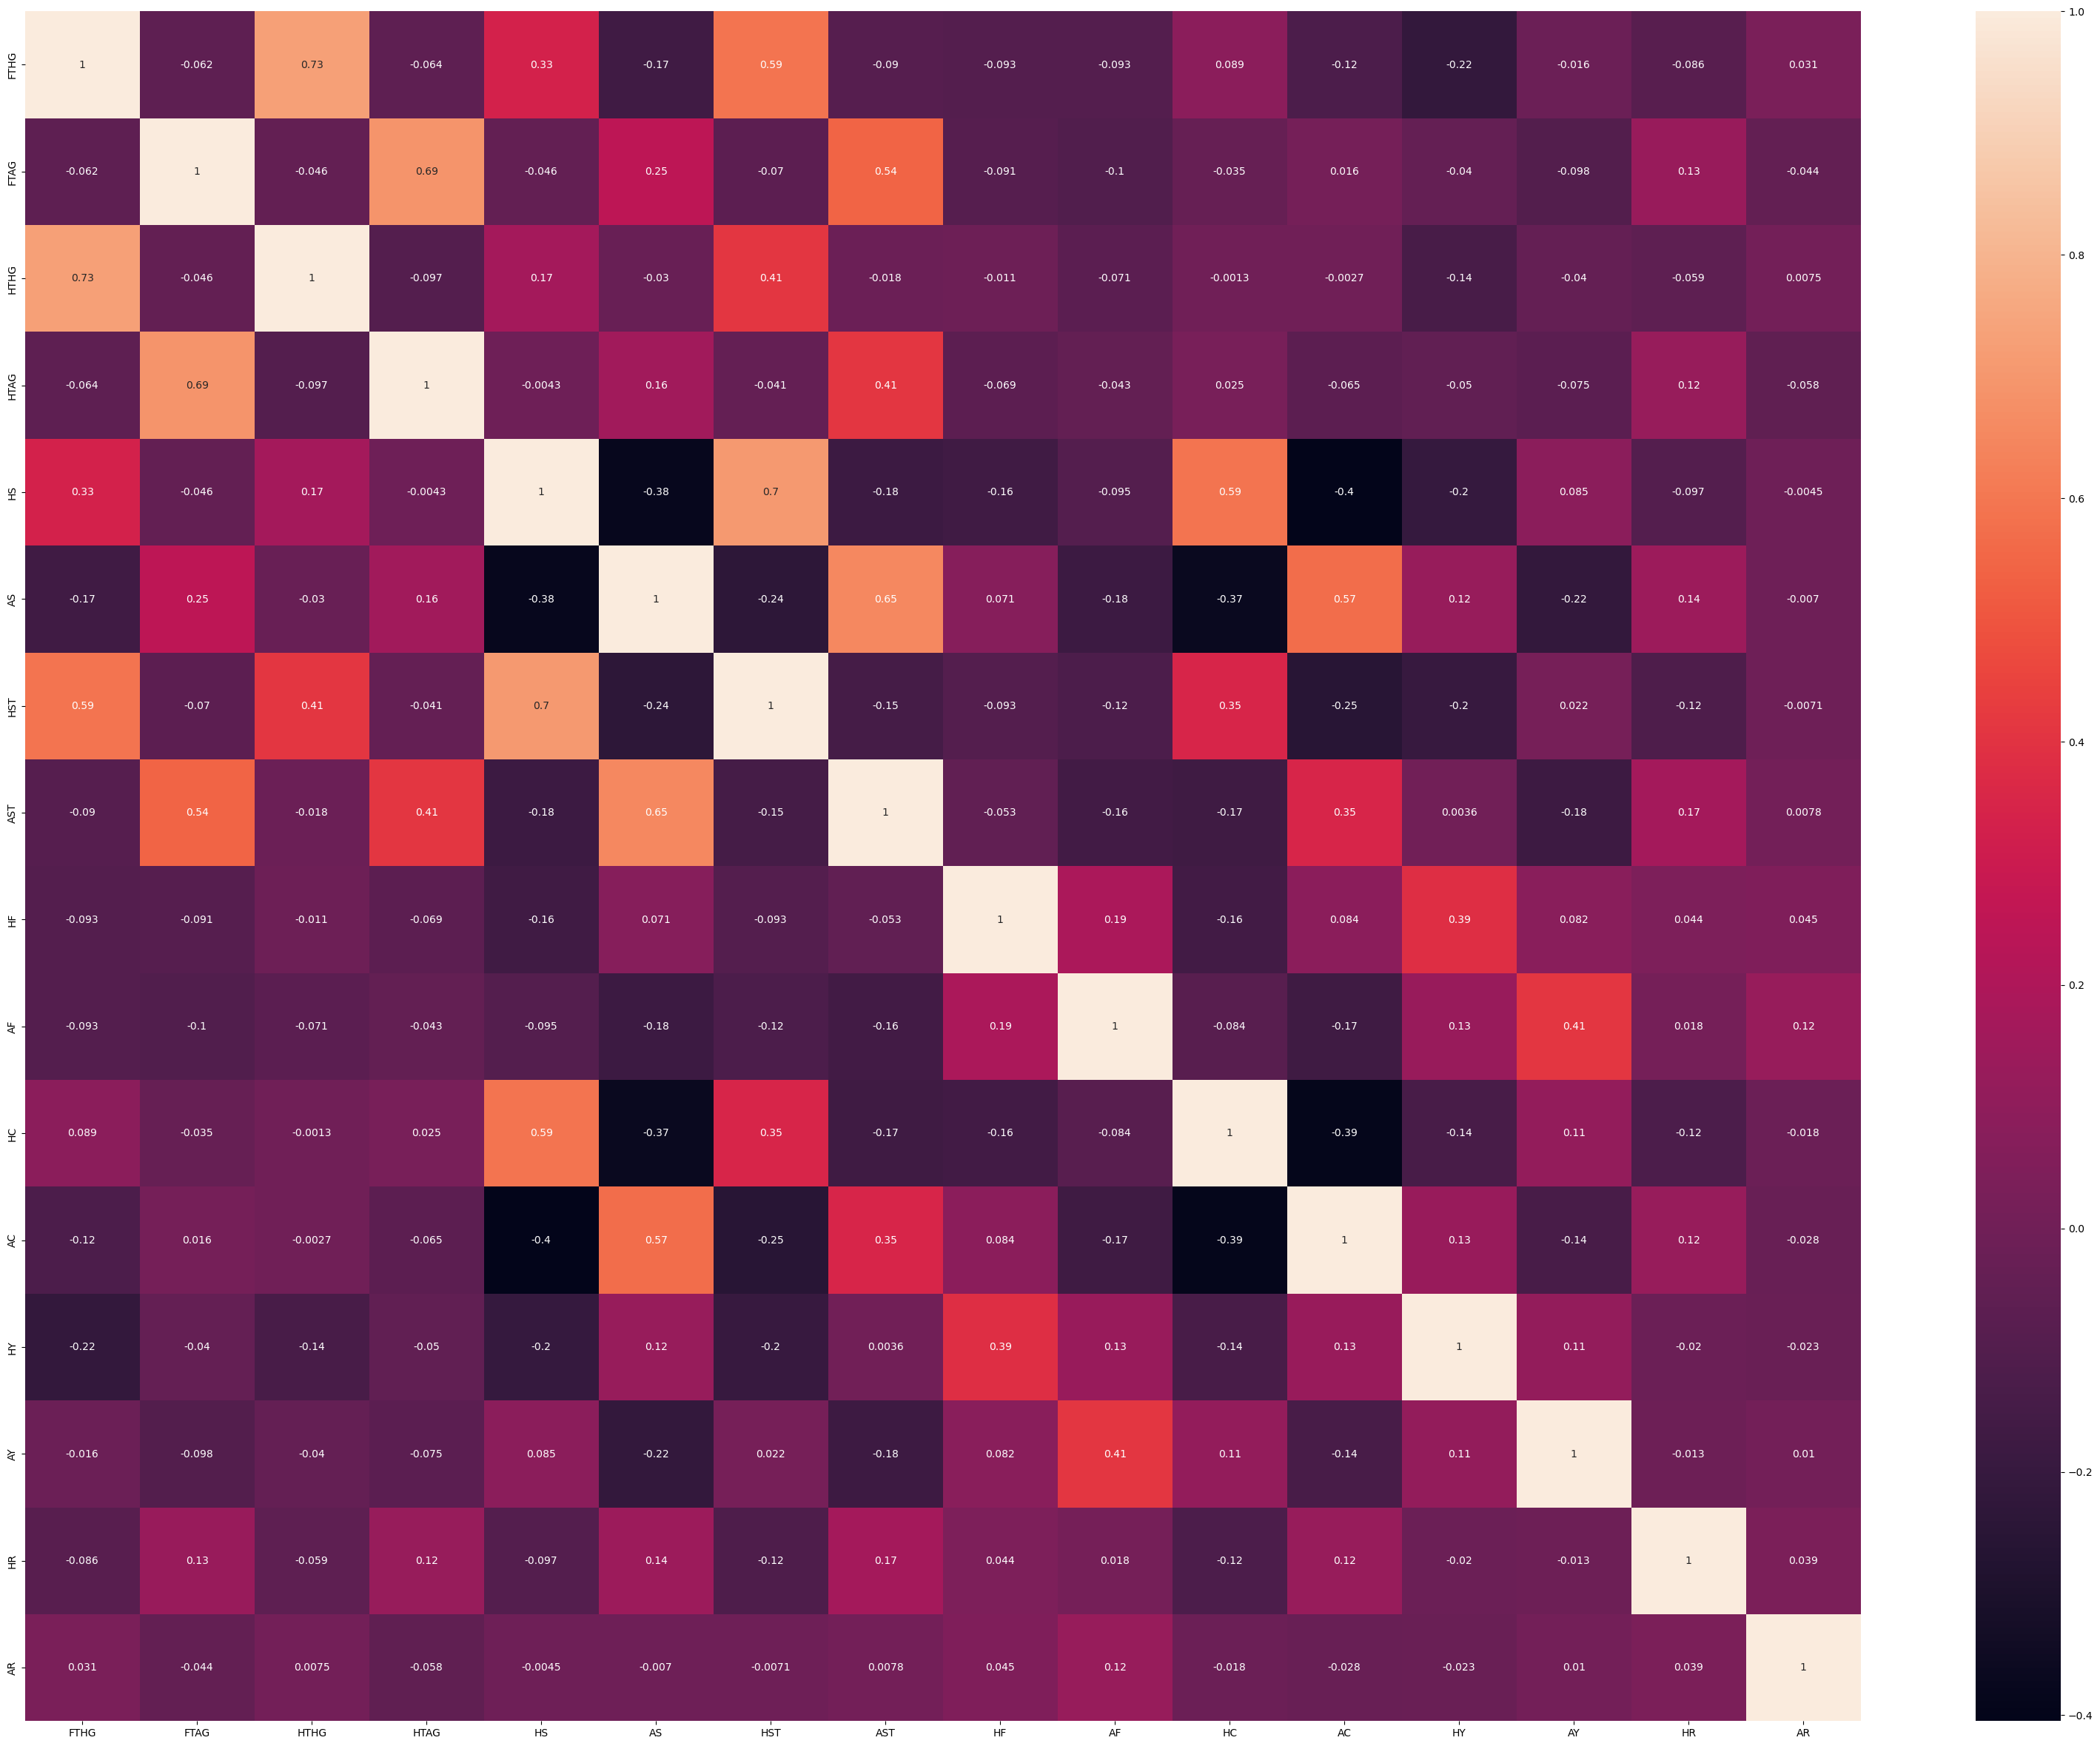

In [15]:
#plotting

plt.figure(figsize=(40,30))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='HTAG', ylabel='count'>

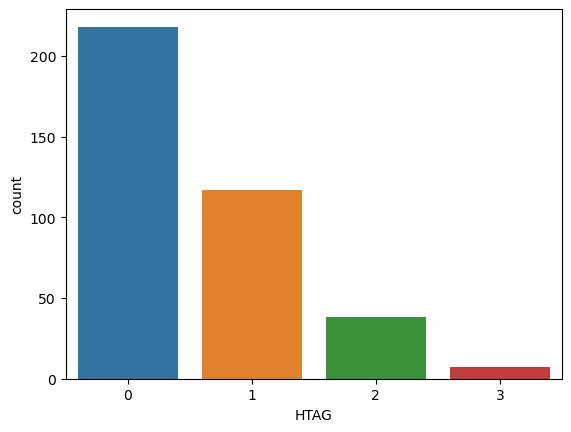

In [19]:
sns.countplot(x=data['HTAG']) #home team away goals

<AxesSubplot:xlabel='HTHG', ylabel='count'>

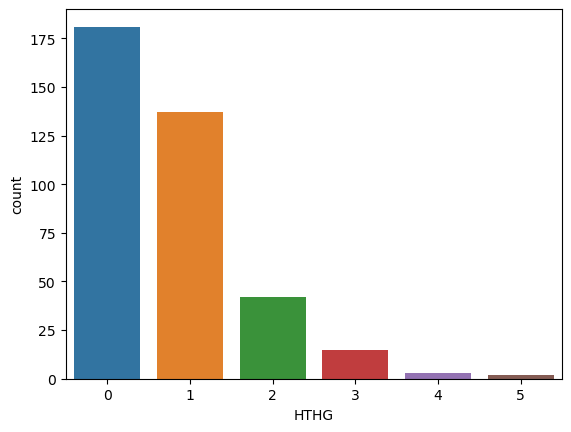

In [20]:
sns.countplot(x=data['HTHG']) #home team home goals

In [22]:
#label encoding

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(data)

In [23]:
data

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,26,13,6,0,0,2,0,0,1,0,...,2,2,16,11,3,5,1,2,0,0
1,30,1,8,11,2,2,1,1,0,2,...,3,4,7,9,4,4,2,0,0,0
2,30,5,2,1,2,0,2,1,0,2,...,3,2,18,16,5,5,3,3,0,0
3,30,5,9,19,2,1,2,1,1,1,...,4,6,13,9,6,4,2,0,0,0
4,30,5,14,15,2,0,2,0,0,1,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,106,8,7,2,1,0,2,0,0,1,...,6,2,11,12,9,3,1,3,0,0
376,106,8,9,17,1,4,0,0,1,0,...,2,7,7,5,12,3,3,0,0,0
377,106,8,10,18,2,1,2,1,0,2,...,4,3,8,10,3,5,1,1,0,0
378,106,8,13,8,2,1,2,1,1,1,...,8,3,14,10,5,4,1,2,0,0


In [24]:
data.drop(['HR'], axis=1, inplace=True)
data.drop(['AR'], axis=1, inplace=True)

In [25]:
data.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY
0,26,13,6,0,0,2,0,0,1,0,...,10,10,2,2,16,11,3,5,1,2
1,30,1,8,11,2,2,1,1,0,2,...,9,11,3,4,7,9,4,4,2,0
2,30,5,2,1,2,0,2,1,0,2,...,7,15,3,2,18,16,5,5,3,3
3,30,5,9,19,2,1,2,1,1,1,...,12,15,4,6,13,9,6,4,2,0
4,30,5,14,15,2,0,2,0,0,1,...,23,5,10,0,9,14,11,1,0,3


In [27]:
#SELECTING OF THE FEATURE


X_train = data.drop(['HTAG'], axis=1)
Y_train = data['HTHG']

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['Date', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTR', 'HS', 'HST', 'HF', 'AC']

In [29]:
X_train = X_train[selected_features]

In [32]:
#SPLITTING AND SCALING OF THE DATA

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
data = scale.fit_transform(data)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
#applyting knn classification model

In [34]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [35]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, values=[0.8333333333333334], datetime_start=datetime.datetime(2023, 6, 14, 13, 27, 51, 395025), datetime_complete=datetime.datetime(2023, 6, 14, 13, 27, 51, 416076), params={'KNN_n_neighbors': 3}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


In [36]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9398496240601504
Test Score: 0.8333333333333334


In [ ]:
#applying logistic regression model

In [37]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [40]:
print(f"Training Score: {data}")

Training Score: [[-0.98528759  1.63466183 -0.60697698 ...  0.18798195 -0.53768878
   0.06207615]
 [-0.86880341 -1.55083302 -0.26013299 ... -0.16740681  0.26357293
  -1.41223244]
 [-0.86880341 -0.4890014  -1.30066495 ...  0.18798195  1.06483463
   0.79923045]
 ...
 [ 1.34439606  0.30737231  0.086711   ...  0.18798195 -0.53768878
  -0.67507814]
 [ 1.34439606  0.30737231  0.60697698 ... -0.16740681 -0.53768878
   0.06207615]
 [ 1.34439606  0.30737231  1.12724296 ...  1.60953698 -1.33895048
   0.06207615]]


In [ ]:
#applying SVM model

In [47]:
from sklearn.svm import SVC, LinearSVC

In [48]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [49]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

FrozenTrial(number=1, values=[1.0], datetime_start=datetime.datetime(2023, 6, 14, 14, 8, 2, 376693), datetime_complete=datetime.datetime(2023, 6, 14, 14, 8, 2, 380659), params={'kernel': 'linear', 'c': 0.8}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=1, state=TrialState.COMPLETE, value=None)


In [50]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif kernel == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif kernel == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

SVC(C=0.8, kernel='linear')

In [51]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 1.0
Test Score: 1.0


In [54]:
#summary of the models that i have implemented on this real time english premier league dataset
from tabulate import tabulate

data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", data,], 
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════════════════════════════════════════════════════════╤══════════════╕
│ Model               │ Train Score                                                       │   Test Score │
╞═════════════════════╪═══════════════════════════════════════════════════════════════════╪══════════════╡
│ KNN                 │ 0.9398496240601504                                                │     0.833333 │
├─────────────────────┼───────────────────────────────────────────────────────────────────┼──────────────┤
│ Logistic Regression │ [[-0.98528759  1.63466183 -0.60697698 ...  0.18798195 -0.53768878 │              │
│                     │    0.06207615]                                                    │              │
│                     │  [-0.86880341 -1.55083302 -0.26013299 ... -0.16740681  0.26357293 │              │
│                     │   -1.41223244]                                                    │              │
│                     │  [-0.86880341

In [9]:
from tensorflow.keras.models import load_model


In [19]:
model.save("C:/Users/danis/Downloads.hdf5")


NameError: name 'model' is not defined